In [1]:
__author__ = 'xuanzee'

## Project Objective

Understanding the general trends of the technology market; Understanding potential hiring market of developers.  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

## Data Preview

In [3]:
df = pd.read_csv('developer_dataset.csv')

/var/folders/wj/788mpgtj6k58z8l4jyytkfq40000gn/T/ipykernel_64761/1180764894.py:1: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


In [4]:
# Skim the variables available
print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


In [5]:
# Preview data to decide the dtypes in question
print(df.head())

   RespondentID  Year        Country          Employment  \
0             1  2018  United States  Employed full-time   
1             1  2019  United States  Employed full-time   
2             1  2020  United States  Employed full-time   
3             2  2018  United States  Employed full-time   
4             2  2019  United States  Employed full-time   

                                      UndergradMajor  \
0  Computer science, computer engineering, or sof...   
1  Computer science, computer engineering, or sof...   
2  Computer science, computer engineering, or sof...   
3  Computer science, computer engineering, or sof...   
4  Computer science, computer engineering, or sof...   

                                             DevType  \
0           Engineering manager;Full-stack developer   
1                              Developer, full-stack   
2                                                NaN   
3                               Full-stack developer   
4  Data or business an

In [6]:
df = pd.read_csv('developer_dataset.csv', dtype={'NEWJobHunt': str, 'NEWJobHuntResearch': str, 'NEWLearn': str})

In [7]:
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111209 entries, 0 to 111208
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   RespondentID            111209 non-null  int64  
 1   Year                    111209 non-null  int64  
 2   Country                 111209 non-null  object 
 3   Employment              109425 non-null  object 
 4   UndergradMajor          98453 non-null   object 
 5   DevType                 100433 non-null  object 
 6   LanguageWorkedWith      102018 non-null  object 
 7   LanguageDesireNextYear  96044 non-null   object 
 8   DatabaseWorkedWith      85859 non-null   object 
 9   DatabaseDesireNextYear  74234 non-null   object 
 10  PlatformWorkedWith      91609 non-null   object 
 11  PlatformDesireNextYear  85376 non-null   object 
 12  Hobbyist                68352 non-null   object 
 13  OrgSize                 54804 non-null   object 
 14  YearsCodePro        

In [9]:
df = df.astype({'RespondentID':str, 'Year': str})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111209 entries, 0 to 111208
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   RespondentID            111209 non-null  object 
 1   Year                    111209 non-null  object 
 2   Country                 111209 non-null  object 
 3   Employment              109425 non-null  object 
 4   UndergradMajor          98453 non-null   object 
 5   DevType                 100433 non-null  object 
 6   LanguageWorkedWith      102018 non-null  object 
 7   LanguageDesireNextYear  96044 non-null   object 
 8   DatabaseWorkedWith      85859 non-null   object 
 9   DatabaseDesireNextYear  74234 non-null   object 
 10  PlatformWorkedWith      91609 non-null   object 
 11  PlatformDesireNextYear  85376 non-null   object 
 12  Hobbyist                68352 non-null   object 
 13  OrgSize                 54804 non-null   object 
 14  YearsCodePro        

In [11]:
df.describe()

,YearsCodePro,ConvertedComp,WorkWeekHrs
count,94793.000000,9.133300e+04,51089.000000
mean,9.547045,1.251777e+05,41.051670
std,7.548931,2.461218e+05,13.833929
min,0.000000,0.000000e+00,1.000000
25%,4.000000,4.600000e+04,40.000000
50%,8.000000,7.900000e+04,40.000000
75%,14.000000,1.200000e+05,42.000000
max,50.000000,2.000000e+06,475.000000


In [12]:
print('% Missing Data:')
print((1 - df.count() / len(df)) * 100)

% Missing Data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


In [13]:
# Remove columns with 60% or more missing data.
df.drop(columns=['NEWJobHunt','NEWJobHuntResearch','NEWLearn'], inplace=True)

## Examine Developers by Country
With 'Employment' and 'DevType' as main fields to use.

In [14]:
# Check where data is missing at the country level
df[['RespondentID', 'Country']].groupby('Country').count()

,RespondentID
Country,
Canada,8979
China,2072
France,6861
Germany,16215
Japan,1049
Mexico,1918
Spain,4534
United Kingdom,15854
United States,53727


In [15]:
missing_data = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()

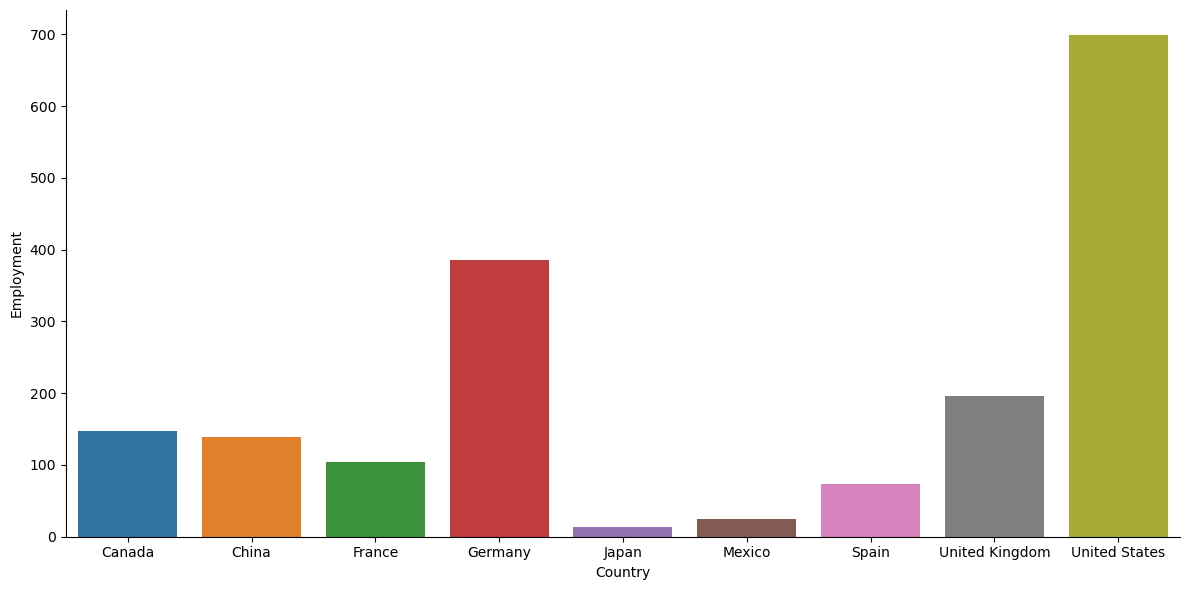

In [16]:
A = sns.catplot(data=missing_data, kind='bar', x='Country', y='Employment', height=6, aspect=2)

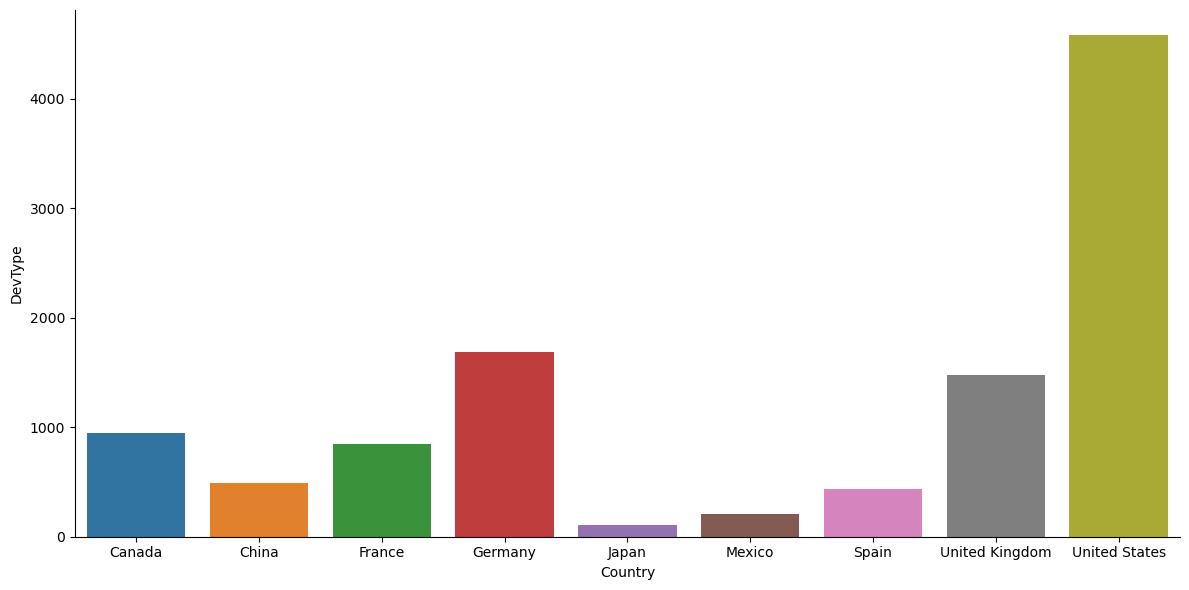

In [17]:
B = sns.catplot(data=missing_data, kind='bar', x='Country', y='DevType', height=6, aspect=2)

In [18]:
# The amount of missing data scales with the size of each country's.
# The missing data is MCAR and less than 10%, thus they can be safely deleted for better analyses.

In [19]:
# Pairwise Deletion
df.dropna(subset=['Employment', 'DevType'], inplace=True, how='any')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99975 entries, 0 to 111198
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RespondentID            99975 non-null  object 
 1   Year                    99975 non-null  object 
 2   Country                 99975 non-null  object 
 3   Employment              99975 non-null  object 
 4   UndergradMajor          90585 non-null  object 
 5   DevType                 99975 non-null  object 
 6   LanguageWorkedWith      93514 non-null  object 
 7   LanguageDesireNextYear  88101 non-null  object 
 8   DatabaseWorkedWith      80241 non-null  object 
 9   DatabaseDesireNextYear  69346 non-null  object 
 10  PlatformWorkedWith      84252 non-null  object 
 11  PlatformDesireNextYear  78553 non-null  object 
 12  Hobbyist                59930 non-null  object 
 13  OrgSize                 53849 non-null  object 
 14  YearsCodePro            86552 non-nul

## Examine 'Employment' and 'DevType'

In [21]:
print(df['Employment'].unique())

['Employed full-time' 'Employed part-time'
 'Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work' 'Retired']


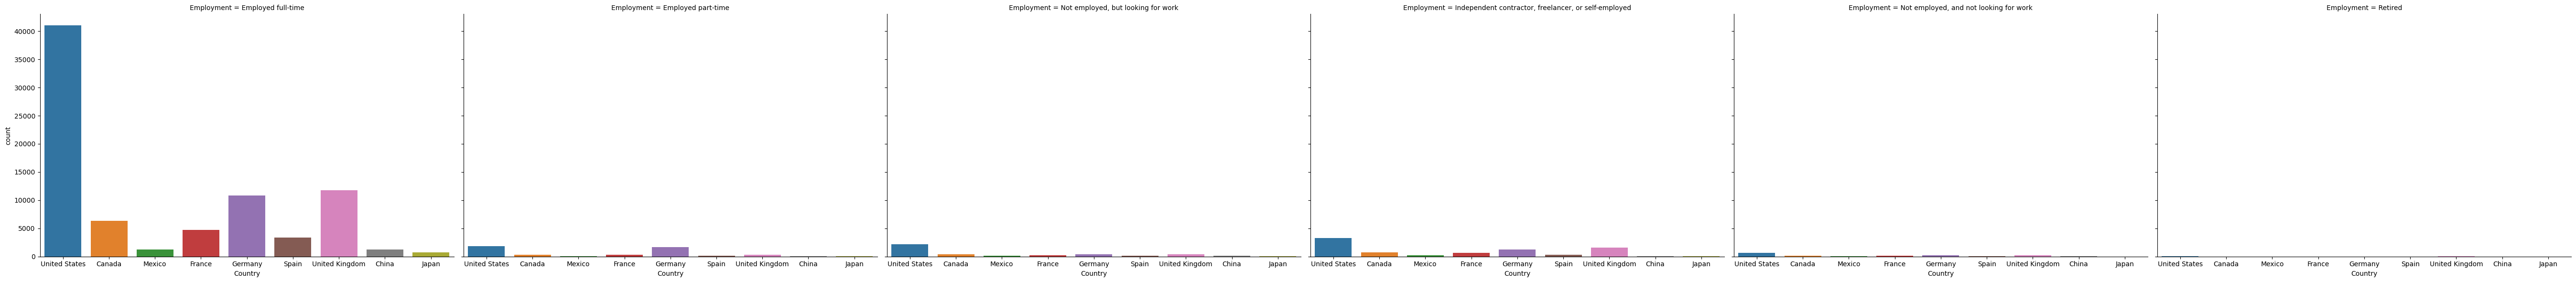

In [22]:
fig_employment = sns.catplot(data=df, kind='count', x='Country', col='Employment', height=6, aspect=1.5)

The majority of respondents are employed full-time.

In [23]:
print(df['DevType'].unique())

['Engineering manager;Full-stack developer' 'Developer, full-stack'
 'Full-stack developer' ...
 'Designer;Educator or academic researcher;Embedded applications or devices developer;Full-stack developer;Student'
 'Back-end developer;Data or business analyst;Designer;DevOps specialist;Educator or academic researcher;Embedded applications or devices developer;Front-end developer'
 'Back-end developer;C-suite executive (CEO, CTO, etc.);Data scientist or machine learning specialist;Database administrator;Desktop or enterprise applications developer;DevOps specialist;Front-end developer;Full-stack developer;Mobile developer;QA or test developer']


In [24]:
# Focus on key roles in the development lifecycle:
# Front-end, Back-end, Full-stack, Mobile, and Admin

In [25]:
df_dev = df[['Country', 'DevType']]

In [26]:
print(df_dev.head())

         Country                                            DevType
0  United States           Engineering manager;Full-stack developer
1  United States                              Developer, full-stack
3  United States                               Full-stack developer
4  United States  Data or business analyst;Database administrato...
5  United States  Developer, back-end;Developer, desktop or ente...


In [27]:
df_dev.loc[df_dev['DevType'].str.contains('front-end'), 'FrontEnd'] = True
df_dev.loc[df_dev['DevType'].str.contains('back-end'), 'BackEnd'] = True
df_dev.loc[df_dev['DevType'].str.contains('full-stack'), 'FullStack'] = True
df_dev.loc[df_dev['DevType'].str.contains('mobile'), 'Mobile'] = True
df_dev.loc[df_dev['DevType'].str.contains('adminstrator'), 'Admin'] = True

/var/folders/wj/788mpgtj6k58z8l4jyytkfq40000gn/T/ipykernel_64761/2800865694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev.loc[df_dev['DevType'].str.contains('front-end'), 'FrontEnd'] = True
/var/folders/wj/788mpgtj6k58z8l4jyytkfq40000gn/T/ipykernel_64761/2800865694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev.loc[df_dev['DevType'].str.contains('back-end'), 'BackEnd'] = True
/var/folders/wj/788mpgtj6k58z8l4jyytkfq40000gn/T/ipykernel_64761/2800865694.py:3: SettingWithCopyWarning: 
A

In [28]:
print(df_dev.head())

         Country                                            DevType FrontEnd  \
0  United States           Engineering manager;Full-stack developer      NaN   
1  United States                              Developer, full-stack      NaN   
3  United States                               Full-stack developer      NaN   
4  United States  Data or business analyst;Database administrato...     True   
5  United States  Developer, back-end;Developer, desktop or ente...      NaN   

  BackEnd FullStack Mobile Admin  
0     NaN       NaN    NaN   NaN  
1     NaN      True    NaN   NaN  
3     NaN       NaN    NaN   NaN  
4    True      True   True   NaN  
5    True       NaN    NaN   NaN  


In [29]:
df_dev = df_dev.melt(id_vars=['Country'], value_vars=['FrontEnd', 'BackEnd', 'FullStack', 'Mobile', 'Admin'],
                    var_name='DevCat', value_name='DevFlag')

In [30]:
print(df_dev.head())

         Country    DevCat DevFlag
0  United States  FrontEnd     NaN
1  United States  FrontEnd     NaN
2  United States  FrontEnd     NaN
3  United States  FrontEnd    True
4  United States  FrontEnd     NaN


In [31]:
df_dev.dropna(how='any', inplace=True)

In [32]:
print(len(df_dev))

90327


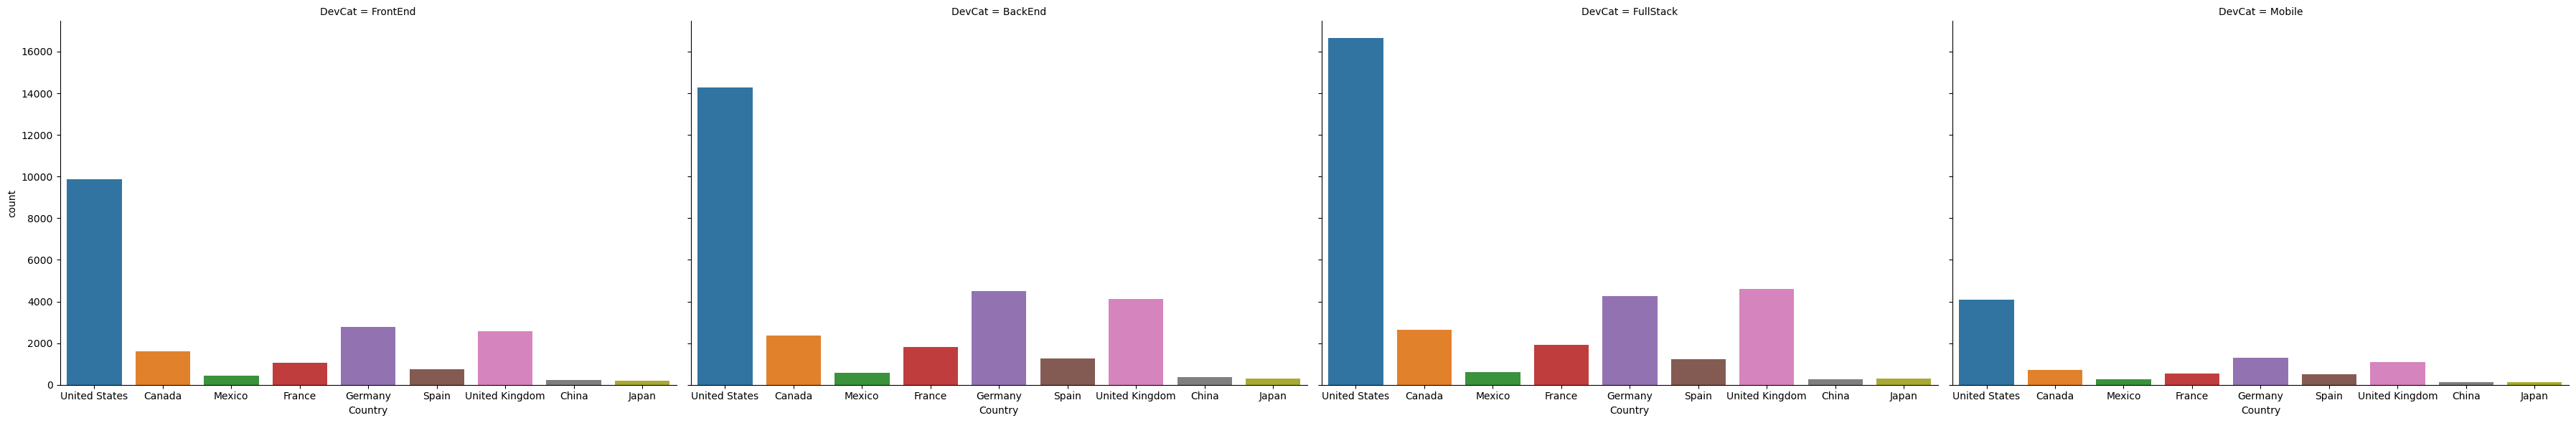

In [33]:
fig_dev = sns.catplot(data=df_dev, kind='count', x='Country', col='DevCat', height=6, aspect=1.5)

The majority of responsdents have skill sets in either front-end or back-end, if not full-stack.

## Examine Undergrad Majors

In [34]:
#Check missing data
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()

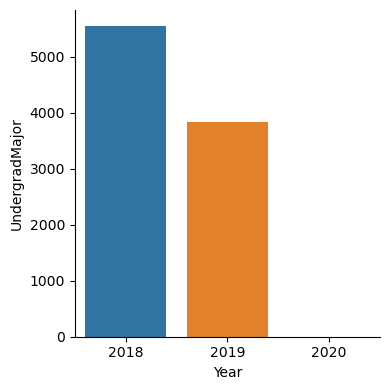

In [35]:
sns.catplot(data=missingUndergrad, kind='bar', x='Year', y='UndergradMajor', height=4, aspect=1)

In [36]:
#Single Imputation technique of NOCB to fill in the gaps for analysis.
df = df.sort_values(['RespondentID', 'Year'])

df['UndergradMajor'].bfill(axis=0, inplace=True)

In [37]:
#Focusing on key major groups as below for analysis:
#social science, natural science, computer science, development, another engineering, never declared.
df_major = df[['Year', 'UndergradMajor']]

#Similar method as above to label majors.
df_major.loc[df_major['UndergradMajor'].str.contains('(?i)social science'), 'SocSci'] = True
df_major.loc[df_major['UndergradMajor'].str.contains('(?i)natural science'), 'NatSci'] = True
df_major.loc[df_major['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
df_major.loc[df_major['UndergradMajor'].str.contains('(?i)development'), 'Dev'] = True
df_major.loc[df_major['UndergradMajor'].str.contains('(?i)another engineering '), 'OtherEng'] = True
df_major.loc[df_major['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

/var/folders/wj/788mpgtj6k58z8l4jyytkfq40000gn/T/ipykernel_64761/198775526.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_major.loc[df_major['UndergradMajor'].str.contains('(?i)social science'), 'SocSci'] = True
/var/folders/wj/788mpgtj6k58z8l4jyytkfq40000gn/T/ipykernel_64761/198775526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_major.loc[df_major['UndergradMajor'].str.contains('(?i)natural science'), 'NatSci'] = True
/var/folders/wj/788mpgtj6k58z8l4jyytkfq40000gn/T/ipykernel_64761/198775

In [38]:
df_major = df_major.melt(id_vars=['Year'], value_vars=['SocSci', 'NatSci', 'ComSci', 'Dev', 'OtherEng', 'NoMajor'],
                        var_name='MajorCat', value_name='MajorFlag')

In [39]:
df_major.dropna(how='any', inplace=True)

In [40]:
#Rearrange so that the years line up in chronological order
df_major = df_major.groupby(['Year', 'MajorCat']).count().reset_index()

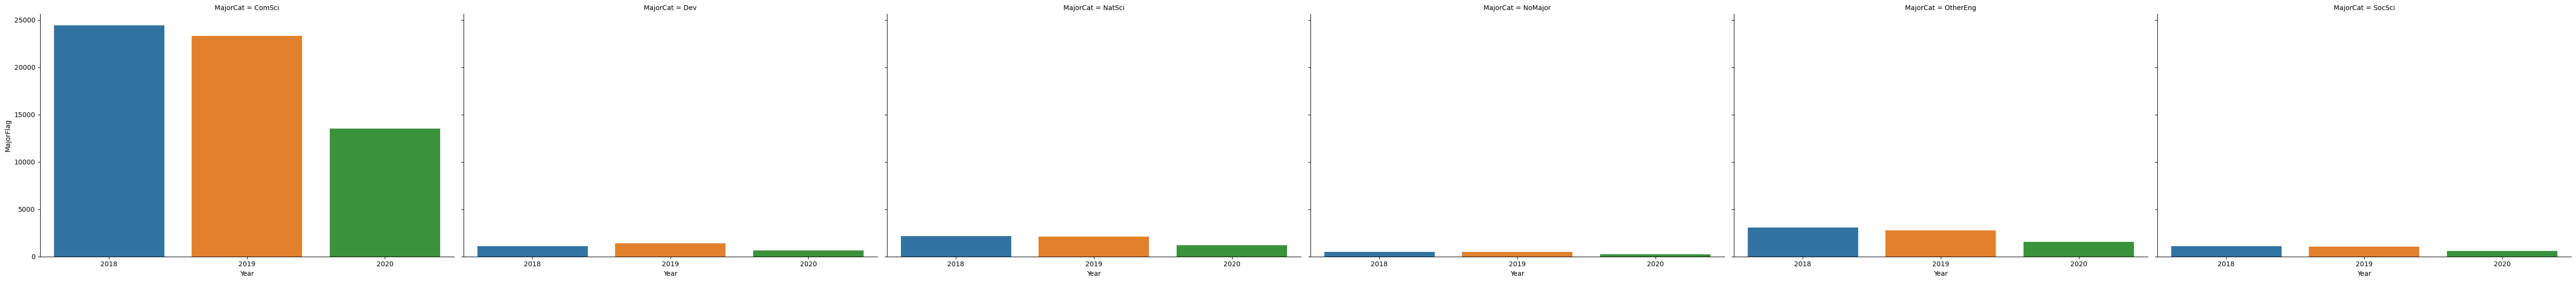

In [41]:
fig_edu = sns.catplot(data=df_major, kind='bar', x='Year', y='MajorFlag', col='MajorCat', height=6, aspect=1.5)

The majority of respondents major in Computer Science, although the number decreases year by year.

## Examine Years of Experience vs. Compensation

In [42]:
#Check general distribution
df_comp = df[['Year', 'YearsCodePro', 'ConvertedComp']]

<Axes: xlabel='Year', ylabel='YearsCodePro'>

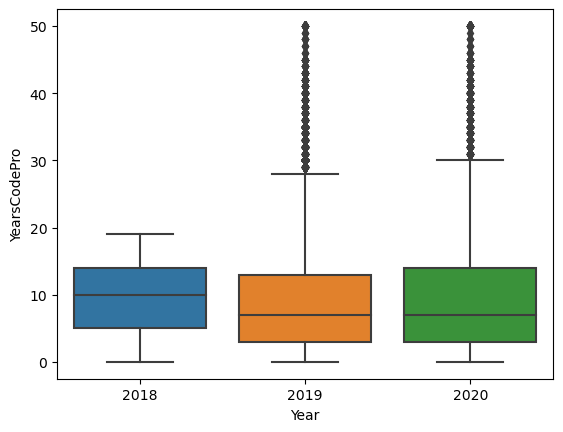

In [43]:
sns.boxplot(data=df_comp, x='Year', y='YearsCodePro')

<Axes: xlabel='Year', ylabel='ConvertedComp'>

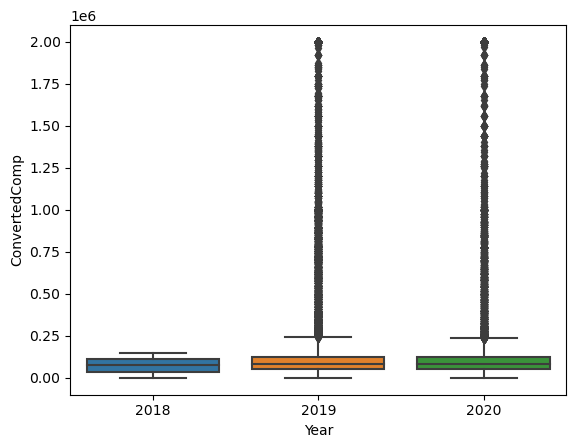

In [44]:
sns.boxplot(data=df_comp, x='Year', y='ConvertedComp')

Overall distribution is consitent year over year, indicating a strong correlation between data points.

In [45]:
#Using Multiple Imputation to fill in the missing data.
df_impute = df[['YearsCodePro', 'ConvertedComp']]

In [46]:
df_train, df_test = train_test_split(df_impute, train_size=0.1)

In [47]:
#Create the IterativeImputer model.
imp = IterativeImputer(max_iter=20, random_state=0)

In [48]:
#Fit the model to dataset.
imp.fit(df_impute)

IterativeImputer(max_iter=20, random_state=0)

In [49]:
#Transform the model on the dataset.
df_comp = pd.DataFrame(data=np.round(imp.transform(df_impute), 0), columns=['YearsCodePro', 'ConvertedComp'])

In [50]:
df_comp_plt = df_comp.loc[df_comp['ConvertedComp']<=150000]

In [51]:
df_comp_plt['CodeYearBins'] = pd.qcut(df_comp_plt['YearsCodePro'], q=5)

/var/folders/wj/788mpgtj6k58z8l4jyytkfq40000gn/T/ipykernel_64761/4163359184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_plt['CodeYearBins'] = pd.qcut(df_comp_plt['YearsCodePro'], q=5)


<Axes: xlabel='CodeYearBins', ylabel='ConvertedComp'>

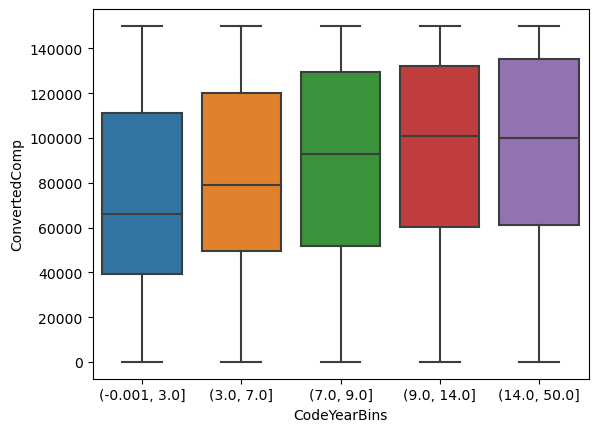

In [52]:
sns.boxplot(data=df_comp_plt, x='CodeYearBins', y='ConvertedComp')

The plot shows that the more experienced a developed was, the more on average they were compensated.

## Summary

The variety of techniques used for handling missing data was essential to reliabily curating a cleaner dataset to complete this set of analyses. We now understand:
* The global presence of the developer community
* Their predominant skill sets and employment status
* Their varied educational backgrounds
* How experience translates into compensation